# Outliers

**Created by:** Jenny Liang (zhenni.liang@unt.edu)

# 1. What Is an Outlier?

**Definition**

An outlier is an observation that lies an abnormally large distance from other values in a dataset. Outliers may arise due to:
* Measurement or data entry errors
* Sampling variability
* Rare but legitimate events
* Data from a different population

**Key idea:**
Outliers are not automatically “bad,” but they require *investigation*.

# 2. Why Outliers Matter

**Outliers can:**
* Distort summary statistics (mean, variance, standard deviation)
* Heavily influence statistical models (especially regression)
* Affect machine learning performance
* Mask or exaggerate patterns in data

**Example:** The mean is sensitive to extreme values (and/or outliers), while the median is more robust.

# 3. Outliers vs. Natural Extremes

Not all extreme values are outliers.

**Examples:**
* Data entry error (e.g., age = 999)
* Rare but possible event
* Different population mixed in

# 4. Visual Detection of Outliers
**Common Tools:**
* Boxplots
* Histograms
* Scatterplots (for multivariate data)

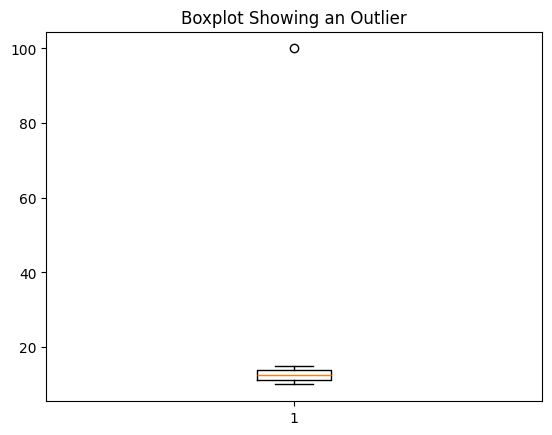

In [1]:
# Example: Visualizing Outliers with a Boxplot

import numpy as np
import matplotlib.pyplot as plt

# Create data
data = np.array([10, 12, 11, 13, 12, 14, 15, 11, 13, 100])

plt.boxplot(data)
plt.title("Boxplot Showing an Outlier")
plt.show()

# 5. Statistical Methods for Detecting Outliers

**5.1 IQR (Interquartile Range) Method**

**Definitions**

**Q1:** 25th percentile

**Q3:** 75th percentile

**IQR** = Q3 − Q1

**Outlier Rule:**
* Lower bound = Q1−1.5×IQR
* Upper bound = Q3+1.5×IQR

In [10]:
# Example: IQR Method in Python
import numpy as np

data = np.array([10, 12, 11, 13, 12, 14, 15, 11, 13, 100])

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Q1: ", Q1,"\n",
      "Q3: ", Q3,"\n",
      "IQR: ", IQR,"\n",
      "Lowerbound: ", lower_bound,"\n",
      "Upperbound: ", upper_bound,"\n",
      "Outliers: ", outliers)

Q1:  11.25 
 Q3:  13.75 
 IQR:  2.5 
 Lowerbound:  7.5 
 Upperbound:  17.5 
 Outliers:  [100]


# 5.2 Z-Score Method

**Definition**

The z-score measures how many standard deviations a value is from the mean:

$Z$ = $(x - μ)/ σ$

**Rule of thumb:**
* $|z| > 3$ → potential outlier when data is approximately normal

In [14]:
# Example: Z-Score Detection
from scipy.stats import zscore
import numpy as np

data = np.array([10, 12, 11, 13, 12, 14, 15, 11, 13, 100])

z_scores = zscore(data)

outliers = data[np.abs(z_scores) > 3]

print("z-scores: \n", z_scores, "\n\n outliers: ", outliers)

z-scores: 
 [-0.42144438 -0.34550845 -0.38347641 -0.30754049 -0.34550845 -0.26957253
 -0.23160457 -0.38347641 -0.30754049  2.99567218] 

 outliers:  []


# 6. Multivariate Outliers

Outliers can exist across multiple variables, even if each variable alone looks normal.

**Common Approaches**
* Scatterplots
* Mahalanobis distance
* Isolation Forest (ML-based)

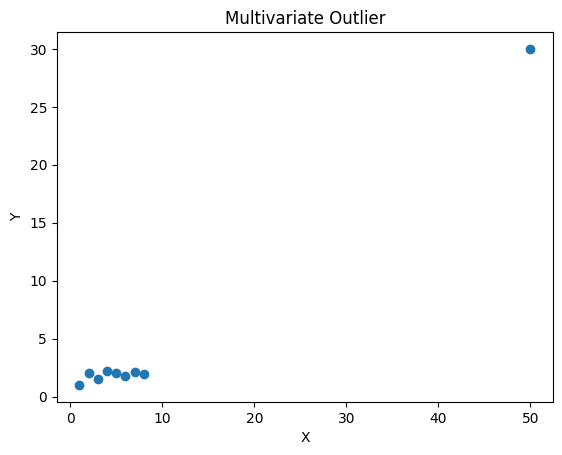

In [15]:
# Example: Scatterplot Outlier
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 50])
y = np.array([1, 2, 1.5, 2.2, 2, 1.8, 2.1, 1.9, 30])

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Multivariate Outlier")
plt.show()

# 7. Handling Outliers

**Common Strategies**

Strategy -> When to Use

* Remove -> Clear data error
* Cap / Winsorize -> Extreme but valid
* Transform (log, sqrt) -> Skewed data
* Robust models -> When outliers are expected
* Flag as feature -> ML applications



In [16]:
# Example: Winsorization
from scipy.stats.mstats import winsorize
import numpy as np

data = np.array([10, 12, 11, 13, 12, 14, 15, 11, 13, 100])

winsorized_data = winsorize(data, limits=[0.1, 0.1])

winsorized_data

masked_array(data=[11, 12, 11, 13, 12, 14, 15, 11, 13, 15],
             mask=False,
       fill_value=999999)

In [20]:
# Example: Log Transformation
import numpy as np

data = np.array([1, 2, 3, 4, 5, 100])

log_data = np.log(data)

print(data, log_data)

[  1   2   3   4   5 100] [0.         0.69314718 1.09861229 1.38629436 1.60943791 4.60517019]


# 8. Outliers and Modeling

**Key Impacts**
* Linear regression is highly sensitive to outliers
* Tree-based models are more robust
* Robust regression (Huber, RANSAC) reduces influence

In [19]:
# Example: Outlier Impact on Mean vs Median
import numpy as np

data = np.array([10, 12, 11, 13, 12, 100])

mean_value = np.mean(data)
median_value = np.median(data)

print(mean_value, median_value)

26.333333333333332 12.0


# 9. Best Practices

* Never remove outliers without justification
* Always visualize before deciding
* Document decisions clearly
* Consider domain knowledge
* Test model sensitivity with and without outliers

# 10. Summary
* Outliers are extreme observations, not automatically errors
* Detection methods include visual, IQR, and z-score
* Handling depends on context and goals
* Outliers can strongly affect statistics and models